In [58]:
import pandas as pd
import numpy as np

In [59]:
car_df=pd.read_csv("CarPrice_Assignment.csv")

In [60]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [61]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [62]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
car_df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [64]:
car_df["carbody"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: carbody, Length: 205, dtype: object

<AxesSubplot:ylabel='Frequency'>

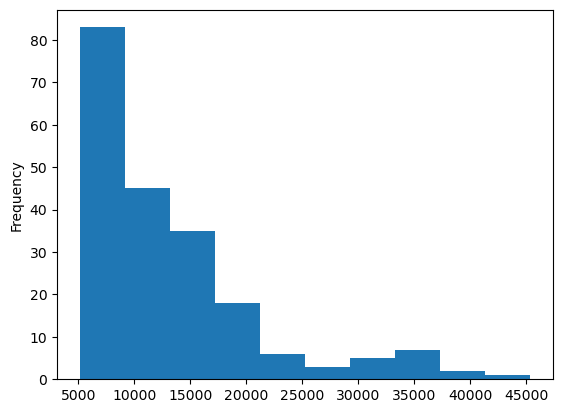

In [65]:
car_df["price"].plot.hist()

<AxesSubplot:xlabel='carbody'>

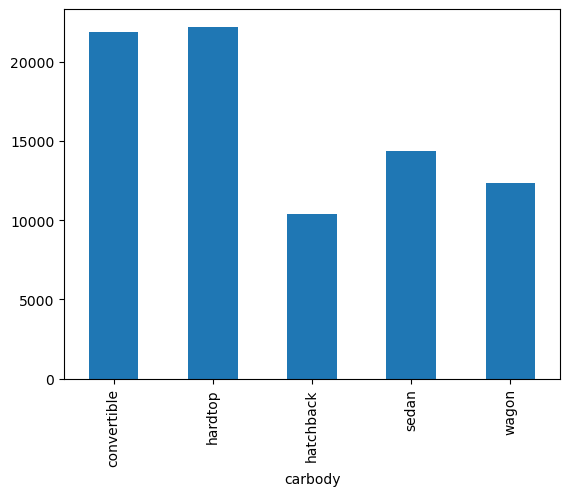

In [66]:
car_df.groupby("carbody")["price"].mean().plot.bar()

In [67]:
car_df["carbody"].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [68]:
car_df.drop(columns=["carbody"],inplace=True)

In [69]:
len(car_df.select_dtypes(include=["int64","float64"]).columns)

16

In [70]:
numeric_columns = car_df.select_dtypes(include=["int64","float64"])

In [71]:
corr_matrix = numeric_columns.corr()
print(corr_matrix.shape)

(16, 16)


In [72]:
corr_matrix

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [73]:
import seaborn as sns

In [74]:
import matplotlib.pyplot as plt

In [75]:
import pandas
import matplotlib
import numpy
import seaborn
import sklearn

In [76]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:>

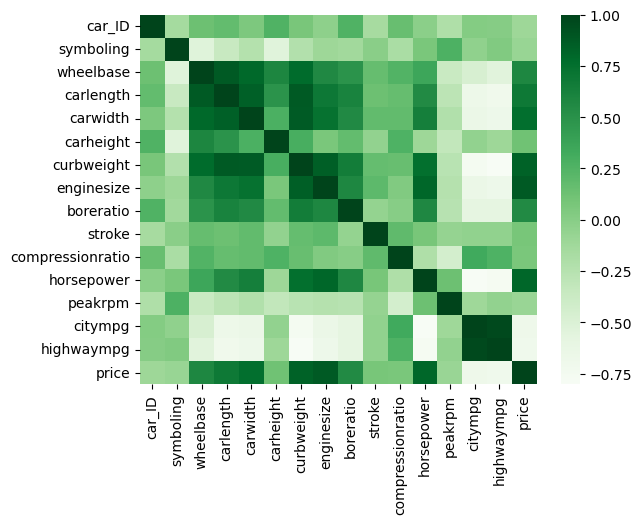

In [77]:
sns.heatmap(corr_matrix, cmap="Greens")

In [78]:
important_columns = ["symboling","wheelbase","carlength","carwidth","boreratio","highwaympg","price"]

In [79]:
training_data = car_df[important_columns]
training_data

,symboling,wheelbase,carlength,carwidth,boreratio,highwaympg,price
0,3,88.6,168.8,64.1,3.47,27,13495.0
1,3,88.6,168.8,64.1,3.47,27,16500.0
2,1,94.5,171.2,65.5,2.68,26,16500.0
3,2,99.8,176.6,66.2,3.19,30,13950.0
4,2,99.4,176.6,66.4,3.19,22,17450.0
...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,3.78,28,16845.0
201,-1,109.1,188.8,68.8,3.78,25,19045.0
202,-1,109.1,188.8,68.9,3.58,23,21485.0
203,-1,109.1,188.8,68.9,3.01,27,22470.0


In [80]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symboling   205 non-null    int64  
 1   wheelbase   205 non-null    float64
 2   carlength   205 non-null    float64
 3   carwidth    205 non-null    float64
 4   boreratio   205 non-null    float64
 5   highwaympg  205 non-null    int64  
 6   price       205 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.3 KB


In [81]:
# split the data into input and output
x = training_data.drop(columns=["price"])
y=training_data["price"]

In [82]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state = 50)

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 6)
(62, 6)
(143,)
(62,)


In [85]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 77 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symboling   143 non-null    int64  
 1   wheelbase   143 non-null    float64
 2   carlength   143 non-null    float64
 3   carwidth    143 non-null    float64
 4   boreratio   143 non-null    float64
 5   highwaympg  143 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.8 KB


In [87]:
# choose the algorithm
from sklearn.linear_model import LinearRegression

In [88]:
#Initialise the model with default
LR = LinearRegression()

In [89]:
# Train the model
LR.fit(x_train,y_train)

/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: Future

LinearRegression()

In [90]:
# predict sale price for any two cars # any_two_cars_input=x.test[1:3]
x_test.iloc[1:3]

,symboling,wheelbase,carlength,carwidth,boreratio,highwaympg
170,2,98.4,176.2,65.6,3.62,30
12,0,101.2,176.8,64.8,3.31,28


In [91]:
# select the actual price of these two cars
y_test.iloc[1:3]

170    11199.0
12     20970.0
Name: price, dtype: float64

In [92]:
# predict the price of these two cars
LR.predict(x_test.iloc[1:3])

/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([14392.51401961, 10694.63903284])

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
# prediction on the test data
pred_y_test = LR.predict(x_test)
# prediction on the training data
pred_y_train = LR.predict(x_train)

/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:767: Future

In [95]:
list(zip(y_train,pred_y_train))

[(6189.0, 7960.868119686289),
 (6918.0, 4924.920163044735),
 (9960.0, 12417.083088192332),
 (13645.0, 16327.58626063951),
 (9895.0, 15803.106748160877),
 (45400.0, 31761.555674906907),
 (7957.0, 8340.923249359766),
 (9495.0, 8893.43967038457),
 (12940.0, 16220.470442838123),
 (11694.0, 14733.949650831375),
 (24565.0, 16330.379003408016),
 (19045.0, 21259.92229146682),
 (6229.0, 5991.198217933241),
 (16503.0, 21383.222775443486),
 (9988.0, 12992.549373610993),
 (7738.0, 4790.498279449908),
 (16515.0, 16812.837087224412),
 (21485.0, 21267.477844616922),
 (18420.0, 17210.98570125361),
 (8449.0, 14392.51401960681),
 (8949.0, 10270.630649059196),
 (5572.0, 5194.758729153051),
 (13950.0, 14126.041309595603),
 (17950.0, 18611.518190478644),
 (8921.0, 9354.632271417388),
 (9233.0, 14276.36535246484),
 (15985.0, 16220.470442838123),
 (12945.0, 11096.78618077247),
 (18920.0, 26027.012618244247),
 (8845.0, 14393.560752195946),
 (9258.0, 8241.736064164113),
 (17075.0, 20143.260121466825),
 (16925.

In [96]:
 mean_absolute_error(y_test,pred_y_test)


/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/u207602/.conda/envs/machineLearningIntel/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


3531.8471716423633